In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from nltk.corpus import stopwords
from collections import Counter
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
!pip install --upgrade datasets

In [3]:
dataset = load_dataset("emotion")
train_df = pd.DataFrame(dataset['train'])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [4]:
train_df['text_length'] = train_df['text'].apply(len)

In [5]:
label_map = {0:'anger',1:'disgust',2:'fear',3:'joy',4:'neutral',5:'sadness'}
train_df['emotion'] = train_df['label'].map(label_map)

<ipython-input-6-94dced9bd7cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=train_df, palette='pastel')


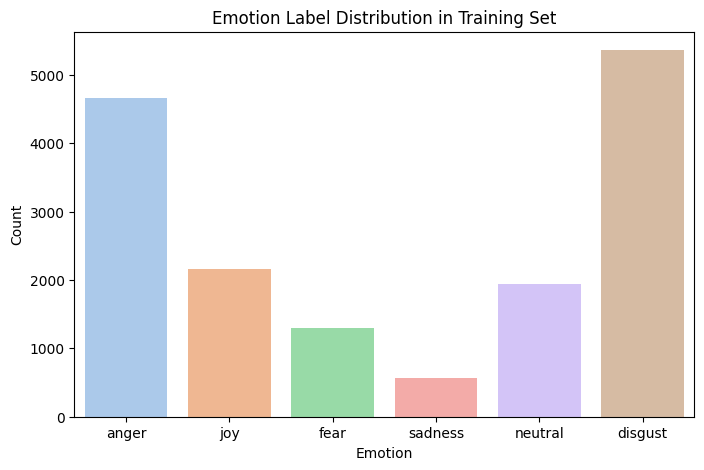

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='emotion', data=train_df, palette='pastel')
plt.title('Emotion Label Distribution in Training Set')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

<ipython-input-7-db4b395be28a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion', y='text_length', data=train_df, palette='Set2')


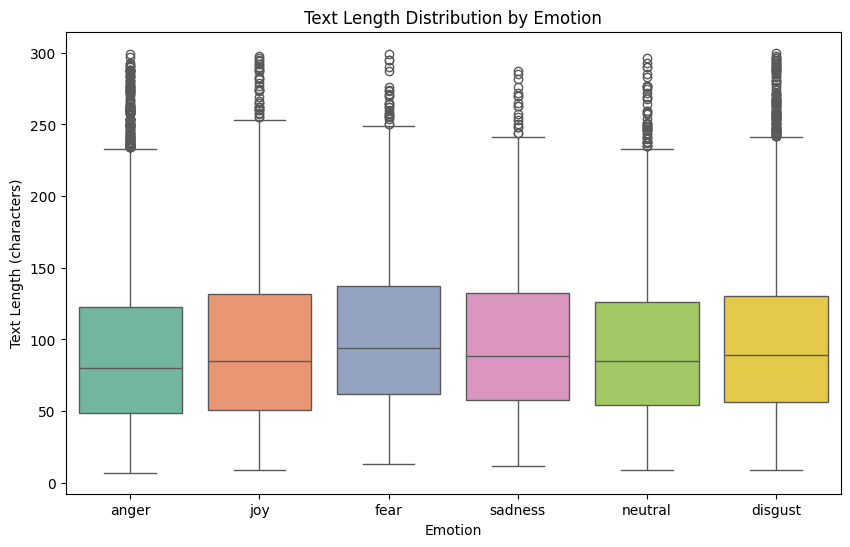

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x='emotion', y='text_length', data=train_df, palette='Set2')
plt.title('Text Length Distribution by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Text Length (characters)')
plt.show()

In [8]:
stop_words = set(stopwords.words('english'))
all_words = ' '.join(train_df['text']).lower().split()
filtered_words = [w for w in all_words if w.isalpha() and w not in stop_words]
common_words = Counter(filtered_words).most_common(15)

<ipython-input-9-4605fea3f758>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='mako')


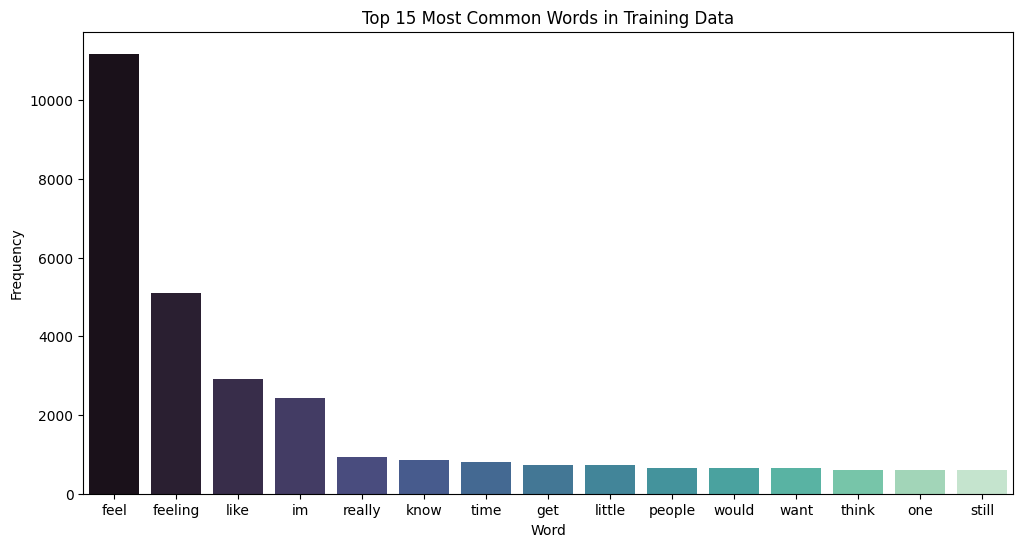

In [9]:
words, counts = zip(*common_words)
plt.figure(figsize=(12,6))
sns.barplot(x=list(words), y=list(counts), palette='mako')
plt.title('Top 15 Most Common Words in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Word')
plt.show()

<ipython-input-10-191767182772>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_length.index, y=avg_length.values, palette='coolwarm')


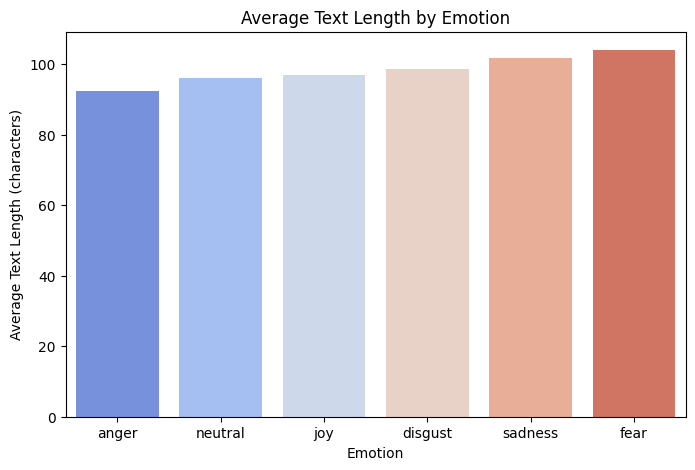

In [10]:
avg_length = train_df.groupby('emotion')['text_length'].mean().sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=avg_length.index, y=avg_length.values, palette='coolwarm')
plt.title('Average Text Length by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Average Text Length (characters)')
plt.show()

<ipython-input-11-3a3e94aa5839>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=short_texts, palette='Set1', ax=axs[0])
<ipython-input-11-3a3e94aa5839>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=long_texts, palette='Set2', ax=axs[1])


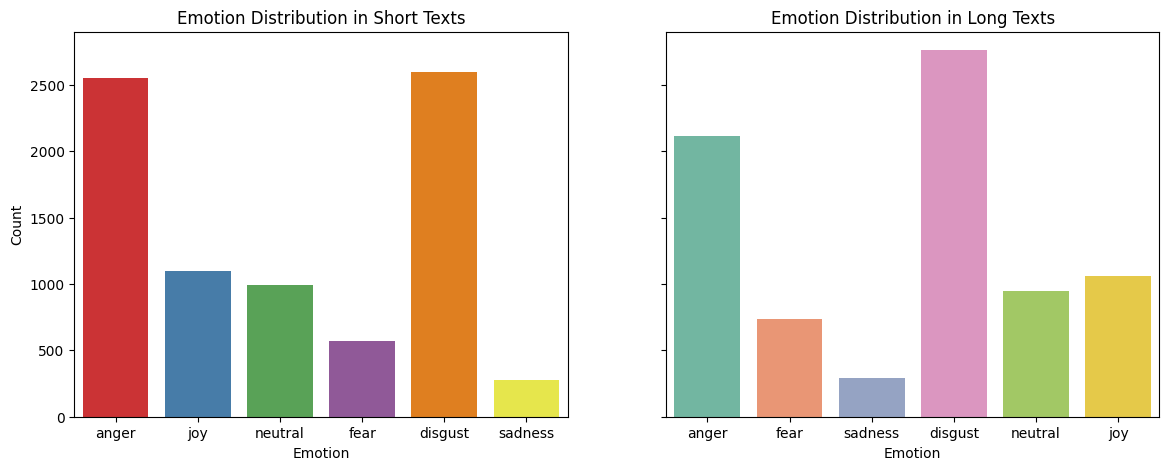

In [11]:

median_len = train_df['text_length'].median()
short_texts = train_df[train_df['text_length'] <= median_len]
long_texts = train_df[train_df['text_length'] > median_len]

fig, axs = plt.subplots(1, 2, figsize=(14,5), sharey=True)
sns.countplot(x='emotion', data=short_texts, palette='Set1', ax=axs[0])
axs[0].set_title('Emotion Distribution in Short Texts')
axs[0].set_xlabel('Emotion')
axs[0].set_ylabel('Count')

sns.countplot(x='emotion', data=long_texts, palette='Set2', ax=axs[1])
axs[1].set_title('Emotion Distribution in Long Texts')
axs[1].set_xlabel('Emotion')
axs[1].set_ylabel('')

plt.show()
